---
title: "Application of R for Finance - Assignment 1"
subtitle: "Data Analysis and Visualisations"
author: Group 30 
date: "5 October 2025"
institute: "Imperial Business School"
format:
  pdf:
    fig-cap-location: top
    include-in-header:
      text: |
        \usepackage[labelfont=bf,textfont=bf]{caption}   
execute:
  warning: false
  message: false
---
\newpage
\tableofcontents
\listoffigures
\newpage

# Setup

## Required libraries
Load the following libraries for data analysis and visualisation.


In [68]:
library(dplyr)
library(lubridate)
library(ggplot2)
library(dplyr)

## Data Frame

Load the dataset **compustat_food_bev.csv** into a data frame.

This dataset contains company identifiers, trading information, and classification codes. List below summarises the main variables.

* **_GVKEY_:**
Global Company Key, unique number assigned to each company in Compustat.  

* **_iid_:**
Issue Identifier, code for specific security of a company.  

* **_datadate_:**
Date of the trading record.  

* **_tic_:**
Ticker Symbol, stock ticker symbol of the company.  

* **_conm_ :**
Company Name, official registered name of the company.  

* **_cshtrd_:**
Number of shares traded during the day.  

* **_prccd_:**
Daily closing price of the security.  

* **_prchd_:**
Daily highest trading price of the security.  

* **_prcld_:**
Daily lowest trading price of the security.  

* **_prcod_:**
Daily opening price of the security.  

* **_exchg_:**
Code for stock exchange listing.  

* **_sic_:**
Standard Industrial Classification, code for primary business industry.  


In [69]:
# load the data
data <- read.csv("compustat_food_bev.csv")

# inspect the strucutre
head(data)

,GVKEY,iid,datadate,tic,conm,cshtrd,prccd,prchd,prcld,prcod,exchg,sic
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,186785,1,01/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,813895,4.47,4.540,4.394,4.41,11,5812
2,186785,1,02/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,518021,4.48,4.522,4.400,4.49,11,5812
3,186785,1,03/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,947825,4.44,4.525,4.360,4.48,11,5812
4,186785,1,04/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,534286,4.41,4.490,4.280,4.48,11,5812
5,186785,1,08/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,669380,4.27,4.415,4.260,4.34,11,5812
6,186785,1,09/09/2020,ARCO,ARCOS DORADOS HOLDINGS INC,1152416,4.38,4.420,4.270,4.27,11,5812


# **Part 1 - Features**

## Indicators Definition

Based on the trading data, several features are calculated to provide deeper insights for analysis. The key indicators to be applied across companies are defined below.

* **Daily Return:**
The percentage change in the value from the previous day, reflecting daily profitability and price variation.
$$
return_{daily} = \frac{(close_t - close_{t-1})}{close_{t-1}}
$$

* **Overnight Return:**
The percentage change from the previous day’s close to the current day’s open, measuring price adjustments that occur outside of trading hours.
$$
return_{overnight} = \frac{(open_t - close_{t-1})}{close_{t-1}}
$$

* **10-Day Momentum Indicator:**
The difference between today's closing price and 10 days ago from the last closing price, tracking short-term trend strength.
$$
momentum_{10\text{-}day} = close_t - close_{t-10}
$$

* **Daily Range:**
The difference between the daily high and low prices,representing intraday volatility.
$$
range_{daily} = high_t - low_t
$$

* **Volume Change:**
The difference in trading volume compared to the previous day, showing Shows in trading activity.
$$
change_{volume} = volume_t - volume_{t-1}
$$

* **Close-Open Change:**
The difference between the daily closing price and the opening price, indicating intraday price direction.
$$
change_{close-open} = close_t - open_t
$$

* **Money Flow Volume Indicator (MFV):**
The flow of the money into and out of the security, estimating buying or selling pressure.
$$
MFV = \frac{((close_t - low_t) - (high_t - close_t))}{(high_t - low_t)} \times volume_t
$$


## Company Analysis

First, each selected company calculates a subset of **four metrics** of the above measures, as specified in the assignment brief.

Next, **additional features** are derived from time-based information. After extracting the month and year from the trading date, indicators performance over specific periods are calculated and key dates associated with extreme values are identified. 

Moreover, corporate announcements (such as M&A, earnings releases, and strategic updates) issued around these **key dates** are examined through [U.S. Securities and Exchange Commission](https://www.sec.gov/) and the investor relations website of each company([Starbucks](https://investor.starbucks.com/ir-home/default.aspx), [Wendy’s](https://www.irwendys.com/home/default.aspx), [Potbelly](https://investors.potbelly.com/#:~:text=The%20Investor%20Relations%20website%20contains%20information%20about%20Potbelly,business%20for%20stockholders%2C%20potential%20investors%2C%20and%20financial%20analysts.), and [Domino's Pizza](https://investors.dominos.co.uk/investors/overview)) to identify potential explanations. Typically, the largest positive high prices reflect a cumulative upward trend, whereas the largest positive daily returns often signal discrete repricing events triggered by new information or sudden shifts in market expectations.

### SBUX (Starbucks)

In [70]:
# subset SBUX
data_SBUX <- filter(data, tic == "SBUX")

# calculate indicators
data_SBUX$return_daily <- (data_SBUX$prccd - lag(data_SBUX$prccd, 1)) / lag(data_SBUX$prccd, 1)
data_SBUX$momentum_10_day <- data_SBUX$prccd - lag(data_SBUX$prccd,10)
data_SBUX$range_daily <- data_SBUX$prchd - data_SBUX$prcld
data_SBUX$MFV <- ((data_SBUX$prccd - data_SBUX$prcld)-(data_SBUX$prchd - data_SBUX$prccd)/(data_SBUX$prchd-data_SBUX$prcld))*data_SBUX$cshtrd


In [71]:
# indicate month and year
data_SBUX$datadate <- as.Date(data_SBUX$datadate, format = '%d/%m/%Y')
data_SBUX$month <- month(data_SBUX$datadate)
data_SBUX$year <- year(data_SBUX$datadate)

In [72]:
# total trading volume in June 2023
total_trading_volume_SBUX <- sum(filter(data_SBUX,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_SBUX <- mean(na.omit(data_SBUX$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_SBUX <- data_SBUX$datadate[which.max(data_SBUX$prchd)]

# date with the largest positive daily return
date_largest_positive_return_SBUX <- data_SBUX$datadate[which.max(data_SBUX$return_daily)]

In [73]:
# display results
cat("The total trading volume for Starbucks in June 2023 is:", as.character(total_trading_volume_SBUX), "\n")
cat("The mean daily return for Starbucks is:", as.character(mean_daily_return_SBUX), "\n")
cat("The date with the largest positive high price for Starbucks is:", as.character(date_largest_positive_high_price_SBUX), "\n")
cat("The date with the largest positive return for Starbucks is:", as.character(date_largest_positive_return_SBUX), "\n")

The total trading volume for Starbucks in June 2023 is: 151045270 
The mean daily return for Starbucks is: 0.000291046723931376 
The date with the largest positive high price for Starbucks is: 2021-07-23 
The date with the largest positive return for Starbucks is: 2022-05-04 


#### Further Analysis: Extreme Dates of Starbucks

**2021-07-23**: The largest positive high price

The peak on occurred four days before Starbucks released its Q3 Fiscal 2021 results. After [July 13](https://investor.starbucks.com/news/financial-releases/news-details/2021/Starbucks-Announces-Q3-Fiscal-Year-2021-Results-Conference-Call/default.aspx) announcement fixed the results date, anticipation and positioning lifted the stock to the July 23 high. The later [July 27](https://investor.starbucks.com/news/financial-releases/news-details/2021/Starbucks-Reports-Record-Q3-Fiscal-2021-Results/default.aspx) record results confirmed expectations, reflecting positive market expectations formed ahead of the official disclosure.

**2022-05-04**: The largest positive return

The largest positive daily return reflects immediate assimilation ofafter-hours disclosures on [May 3](https://investor.starbucks.com/news/financial-releases/news-details/2022/Starbucks-Reports-Q2-Fiscal-2022-Results/default.aspx). Q2 Fiscal 2022 revenue of 7.6 billion dollars, United States comparable sales up 12 percent, and 26.7 million Rewards members. The after hours timing concentrated reactions into the next session, prompting discrete repricing.

### WEN (Wendy's)

In [74]:
# subset WEN
data_WEN <- filter(data, tic == "WEN")

# calculate indicators
data_WEN$return_daily <- (data_WEN$prccd - lag(data_WEN$prccd, 1)) / lag(data_WEN$prccd, 1)
data_WEN$return_overnight <- (data_WEN$prcod - lag(data_WEN$prccd, 1)) / lag(data_WEN$prccd, 1)
data_WEN$volume_change <- data_WEN$cshtrd - lag(data_WEN$cshtrd, 1)
data_WEN$MFV <- ((data_WEN$prccd - data_WEN$prcld)-(data_WEN$prchd - data_WEN$prccd)/(data_WEN$prchd-data_WEN$prcld))*data_WEN$cshtrd


In [75]:
# indicate month and year
data_WEN$datadate <- as.Date(data_WEN$datadate, format = '%d/%m/%Y')
data_WEN$month <- month(data_WEN$datadate)
data_WEN$year <- year(data_WEN$datadate)

In [76]:
# total trading volume in June 2023
total_trading_volume_WEN <- sum(filter(data_WEN,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_WEN <- mean(na.omit(data_WEN$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_WEN <- data_WEN$datadate[which.max(data_WEN$prchd)]

# date with the largest positive daily return
date_largest_positive_return_WEN <- data_WEN$datadate[which.max(data_WEN$return_daily)]

In [77]:
# display results
cat("The total trading volume for Wendy's in June 2023 is:", as.character(total_trading_volume_WEN), "\n")
cat("The mean daily return for Wendy's is:", as.character(mean_daily_return_WEN), "\n")
cat("The date with the largest positive high price for Wendy's is:", as.character(date_largest_positive_high_price_WEN), "\n")
cat("The date with the largest positive return for Wendy's is:", as.character(date_largest_positive_return_WEN), "\n")

The total trading volume for Wendy's in June 2023 is: 54557454 
The mean daily return for Wendy's is: 0.000116474712706267 
The date with the largest positive high price for Wendy's is: 2021-06-08 
The date with the largest positive return for Wendy's is: 2021-06-08 


#### Further Analysis: Extreme Dates of Wendy's

**2021-06-08**: Both the largest positive high price and return

On [June 9](https://www.irwendys.com/news/news-details/2021/The-Wendys-Company-Announces-Refinancing-Transaction/default.aspx), Wendy’s announced a refinancing plan where at least $900 million of new fixed-rate senior secured notes and a $300 million variable funding facility to retire 2015 and 2018 notes. 

However, Wendy’s boost in both its highest price and largest positive daily return is primarly driven by the social media attention shock concentrated demand into a session, producing a gap up open, follow through, and short covering that set a new high and a higher close


### PBPB (Potbelly)

In [78]:
# subset PBPB
data_PBPB <- filter(data, tic == "PBPB")

# calculate indicators
data_PBPB$return_daily <- (data_PBPB$prccd - lag(data_PBPB$prccd, 1)) / lag(data_PBPB$prccd, 1)
data_PBPB$return_overnight <- (data_PBPB$prcod - lag(data_PBPB$prccd, 1)) / lag(data_PBPB$prccd, 1)
data_PBPB$change_close_open <- data_PBPB$prccd - data_PBPB$prcod
data_PBPB$MFV <- ((data_PBPB$prccd - data_PBPB$prcld)-(data_PBPB$prchd - data_PBPB$prccd)/(data_PBPB$prchd-data_PBPB$prcld))*data_PBPB$cshtrd


In [79]:
# indicate month and year
data_PBPB$datadate <- as.Date(data_PBPB$datadate, format = '%d/%m/%Y')
data_PBPB$month <- month(data_PBPB$datadate)
data_PBPB$year <- year(data_PBPB$datadate)

In [80]:
# total trading volume in June 2023
total_trading_volume_PBPB <- sum(filter(data_PBPB,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_PBPB <- mean(na.omit(data_PBPB$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_PBPB <- data_PBPB$datadate[which.max(data_PBPB$prchd)]

# date with the largest positive daily return
date_largest_positive_return_PBPB <- data_PBPB$datadate[which.max(data_PBPB$return_daily)]

In [81]:
# display results
cat("The total trading volume for Potbelly in June 2023 is:", as.character(total_trading_volume_PBPB), "\n")
cat("The mean daily return for Potbelly is:", as.character(mean_daily_return_PBPB), "\n")
cat("The date with the largest positive high price for Potbelly is:", as.character(date_largest_positive_high_price_PBPB), "\n")
cat("The date with the largest positive return for Potbelly is:", as.character(date_largest_positive_return_PBPB), "\n")

The total trading volume for Potbelly in June 2023 is: 6780601 
The mean daily return for Potbelly is: 0.00127986776777774 
The date with the largest positive high price for Potbelly is: 2023-04-26 
The date with the largest positive return for Potbelly is: 2021-03-15 


#### Further Analysis: Extreme Dates of Potbelly

**2023-04-26**: The largest positive high price

Potbelly’s peak price occurred between the [April 24](https://investors.potbelly.com/news-releases/news-release-details/potbelly-corporation-continues-growth-florida-new-shop) announcement of a 16-unit Florida Shop Development Area Agreement to advance its Franchise Growth Acceleration plan, and the [April 27](https://investors.potbelly.com/news-releases/news-release-details/potbelly-corporation-participate-upcoming-burkenroad-reports) notice of management participation at the Burkenroad conference. The development deal was the main catalyst, while subsequent visibility and positioning ahead of the conference added momentum, both culminating in the April 26 high.


**2021-03-15**: The largest positive return

The largest positive return reflected discrete next-day repricing to Potbelly’s [March 11](https://investors.potbelly.com/news-releases/news-release-details/potbelly-corporation-reports-results-fourth-fiscal-quarter-and-5) Q4 Fiscal 2020 release, which signalled a turnaround: sequential SSS improvement, digital sales 35.8% of mix, cost resets and 321 lease renegotiations, strengthened liquidity, and guidance toward 2H21 positive cash flow and profitability.


### DPZ (Domino's Pizza)

In [82]:
# subset DPZ
data_DPZ <- filter(data, tic == "DPZ")

# calculate indicators
data_DPZ$return_daily <- (data_DPZ$prccd - lag(data_DPZ$prccd, 1)) / lag(data_DPZ$prccd, 1)
data_DPZ$return_overnight <- (data_DPZ$prcod - lag(data_DPZ$prccd, 1)) / lag(data_DPZ$prccd, 1)
data_DPZ$change_close_open <- data_DPZ$prccd - data_DPZ$prcod
data_DPZ$MFV <- ((data_DPZ$prccd - data_DPZ$prcld)-(data_DPZ$prchd - data_DPZ$prccd)/(data_DPZ$prchd-data_DPZ$prcld))*data_DPZ$cshtrd


In [83]:
# indicate month and year
data_DPZ$datadate <- as.Date(data_DPZ$datadate, format = '%d/%m/%Y')
data_DPZ$month <- month(data_DPZ$datadate)
data_DPZ$year <- year(data_DPZ$datadate)

In [84]:
# total trading volume in June 2023
total_trading_volume_DPZ <- sum(filter(data_DPZ,  month == 6 & year == 2023)$cshtrd)

# mean daily return over the entire period
mean_daily_return_DPZ <- mean(na.omit(data_DPZ$return_daily))

# date with the largest positive high price
date_largest_positive_high_price_DPZ <- data_DPZ$datadate[which.max(data_DPZ$prchd)]

# date with the largest positive daily return
date_largest_positive_return_DPZ <- data_DPZ$datadate[which.max(data_DPZ$return_daily)]

In [85]:
# display results
cat("The total trading volume for Domino's Pizza in June 2023 is:", as.character(total_trading_volume_DPZ), "\n")
cat("The mean daily return for Domino's Pizza is:", as.character(mean_daily_return_DPZ), "\n")
cat("The date with the largest positive high price for Domino's Pizza is:", as.character(date_largest_positive_high_price_DPZ), "\n")
cat("The date with the largest positive return for Domino's Pizza is:", as.character(date_largest_positive_return_DPZ), "\n")

The total trading volume for Domino's Pizza in June 2023 is: 13772765 
The mean daily return for Domino's Pizza is: 0.000131279516490993 
The date with the largest positive high price for Domino's Pizza is: 2021-12-31 
The date with the largest positive return for Domino's Pizza is: 2021-07-22 


#### Further Analysis: Extreme Dates of Domino's Pizza

**2021-12-31**: The largest positive high price

The highest price followed the [December 16](https://investors.dominos.co.uk/media/news/resolution-franchisees-heralds-new-era-collaboration-and-accelerated-growth) disclosure of a strategic resolution with franchisees, featuring system investment, enhanced promotional alignment, and a step-up in new store openings. Management also lifted medium-term sales aspirations and guided to accelerated system sales growth for 2022. The announcement catalysed a constructive re-rating, with momentum and year-end positioning carrying shares to the December 31 high.

**2021-07-22**: The largest positive return

The outsized gain reflects rapid repricing to Domino’s [July 21](https://ir.dominos.com/news-releases/news-release-details/dominos-pizzar-announces-second-quarter-2021-financial-results) Q2 Fiscal 2021 release: global retail sales growth of 17.1 percent excluding currency, United States comps up 3.5 percent, international comps up 13.9 percent, 238 net store additions, EPS of 3.06 dollars, plus an accelerated one billion dollar share repurchase and fresh one billion dollar authorization with a dividend declaration. The timing concentrated reactions into the July 22 session.

# **Part 2 – Visualisations**

## Entire Dataset

### Task 1
First, visualise the number of tickers on each exchange that have had at least one trading day with a volume greater than 100,000.

The result is displayed in the **bar chart** below to highlight differences in market activity across exchanges.

In [86]:
# generate dataframe of number of stocks with daily trading volume > 100,000 in each exchange
filtered_stocks_volume <- select(filter(data, cshtrd > 100000), tic, datadate, exchg)
filtered_stocks_volume.groupby <- group_by(filtered_stocks_volume, exchg)
result <- summarise(filtered_stocks_volume.groupby, num_stocks = n_distinct(tic))

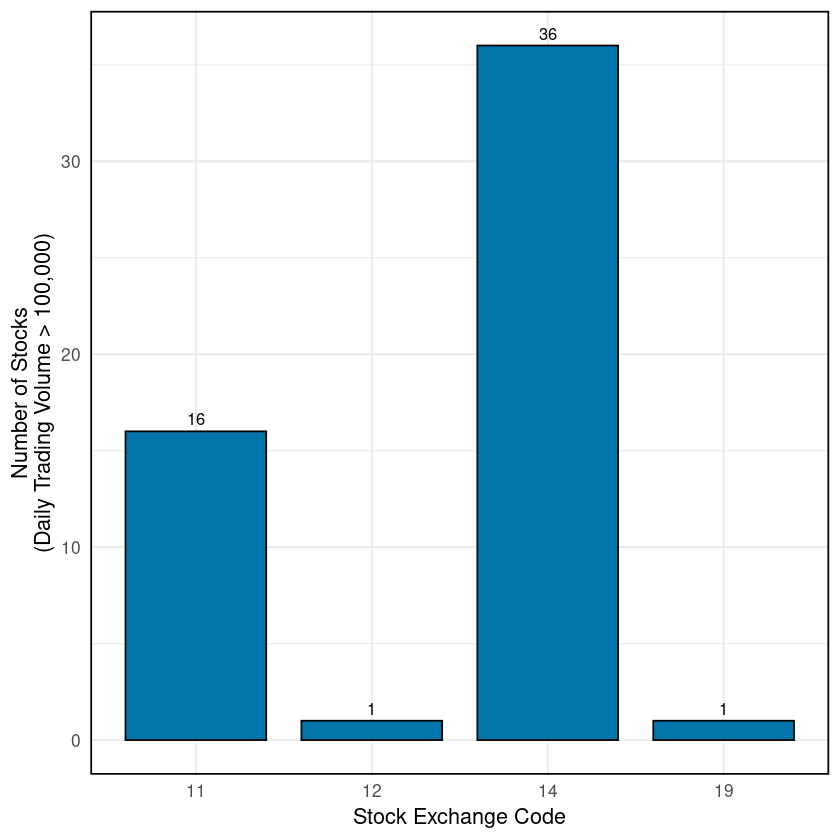

In [87]:
#| fig-cap: "Number of Stocks by Exchange"
# create the bar chart of Number of Stocks by Exchange
ggplot(result, aes(x = as.factor(exchg), y = num_stocks)) +
  geom_col(width = 0.8, fill = "#0076AA", color = "black") + 
  geom_text(aes(label = num_stocks), vjust = -0.5, size = 3.5) +
  labs(x = "Stock Exchange Code", y = "Number of Stocks\n(Daily Trading Volume > 100,000)") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(size = 18, hjust = 0.5, face = "bold"), 
    panel.border = element_rect(color = "black", fill = NA, size = 1), 
  )


## Subset of Analysed Tickers

### Task 2
Next, visualise the closing prices of the tickers analysed by the group.

**Separate and combined line charts** are presented to illustrate each company’s performance over the observation period and to compare the overall price dynamics of the selected firms.

In [88]:
# filter stocks mentioned in part 1 with daily trading volume > 100,000
filtered_stocks <- filter(data, tic %in% c("SBUX", "WEN", "PBPB", "DPZ"))

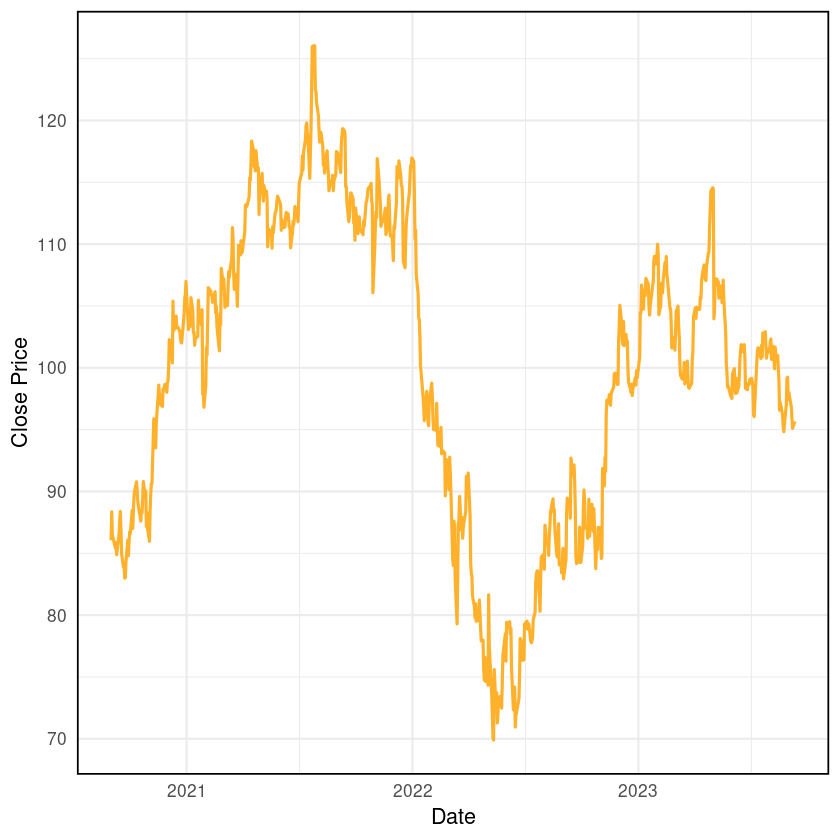

In [89]:
#| fig-cap: "Close Price for Starbucks (SBUX)"
# plot one line plot of close price over time for SBUX
ggplot(data_SBUX, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd)) +
  geom_line(linewidth = 0.9, color = "#ffb12cff") + 
  labs(x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"), 
    panel.border = element_rect(color = "black", fill = NA, size = 1), 
  )

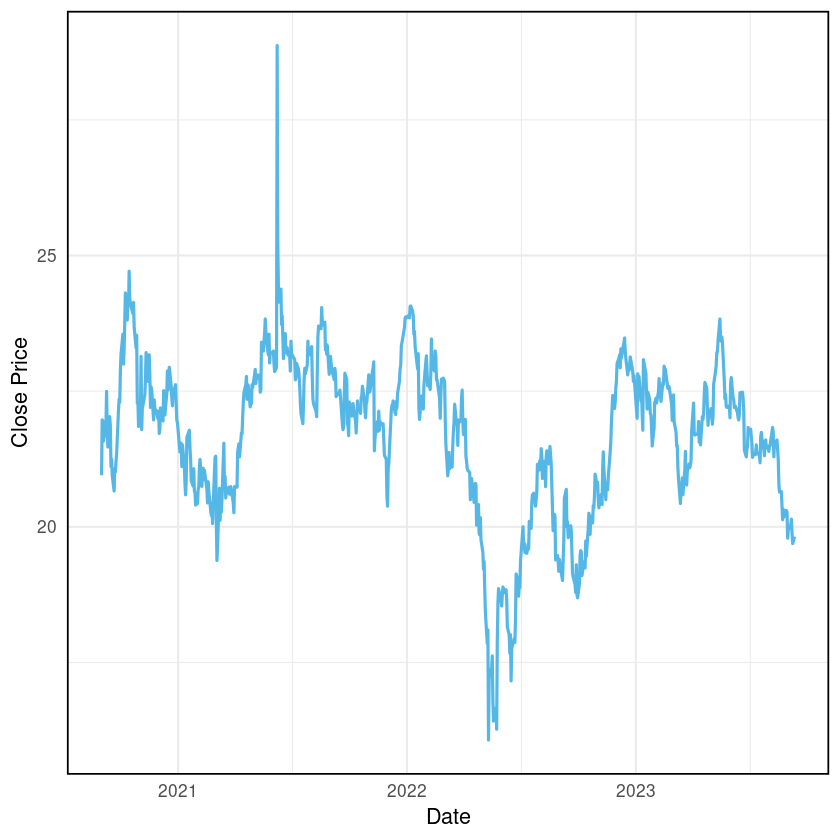

In [90]:
#| fig-cap: "Close Price for Wendy's (WEN)"
# plot one line plot of close price over time for WEN
ggplot(data_WEN, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd)) +
  geom_line(linewidth = 0.9, color = "#55B7E6") + 
  labs(x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1)
  )

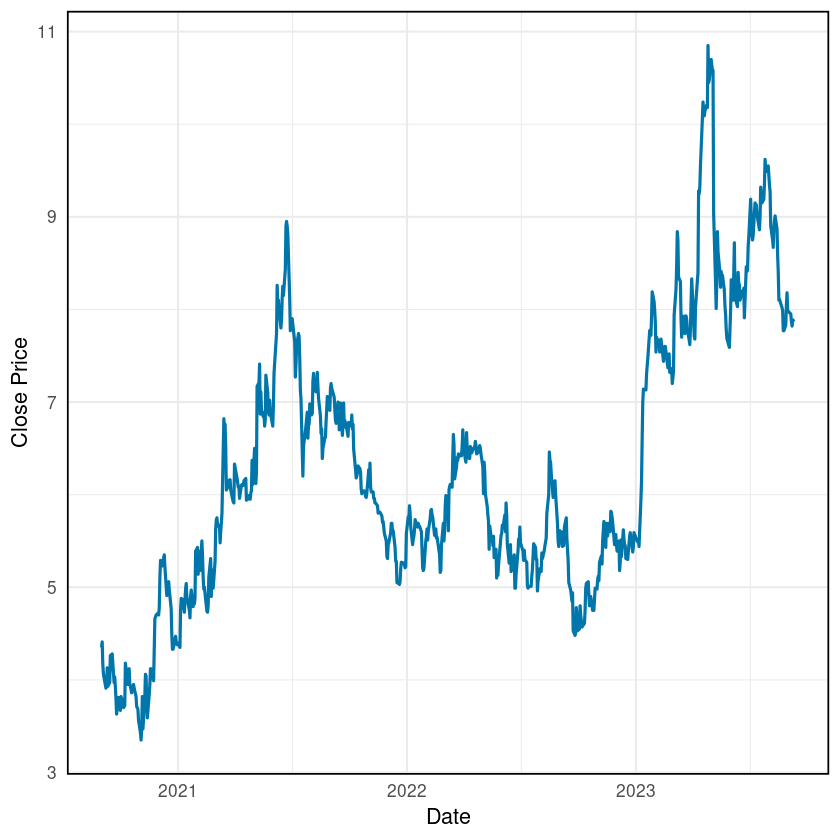

In [91]:
#| fig-cap: "Close Price for Potbelly (PBPB)"
# plot one line plot of close price over time for PBPB
ggplot(data_PBPB, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd)) +
  geom_line(linewidth = 0.9, color = "#0076AA") +
  labs(x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1)
  )

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


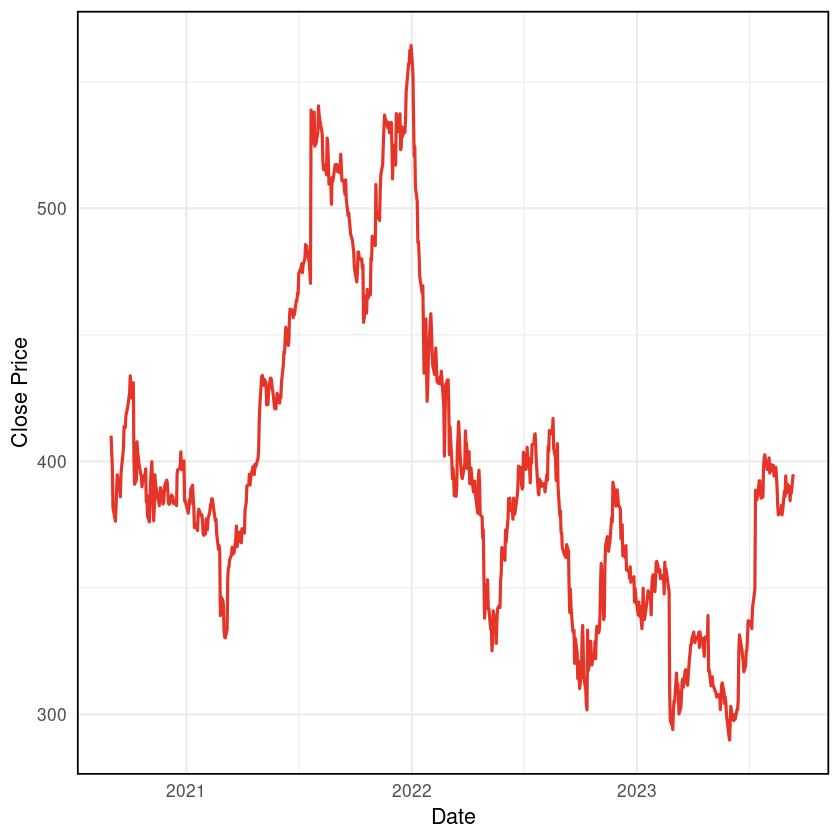

In [92]:
#| fig-cap: "Close Price for Domino's Pizza (DPZ)"
# plot one line plot of close price over time for DPZ
ggplot(data_DPZ, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = prccd)) +
  geom_line(linewidth = 0.9, color = "#E53528") +
  labs(x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1)
  )

Because DPZ’s nominal price is far above others, scaling was required to visualise joint movement

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


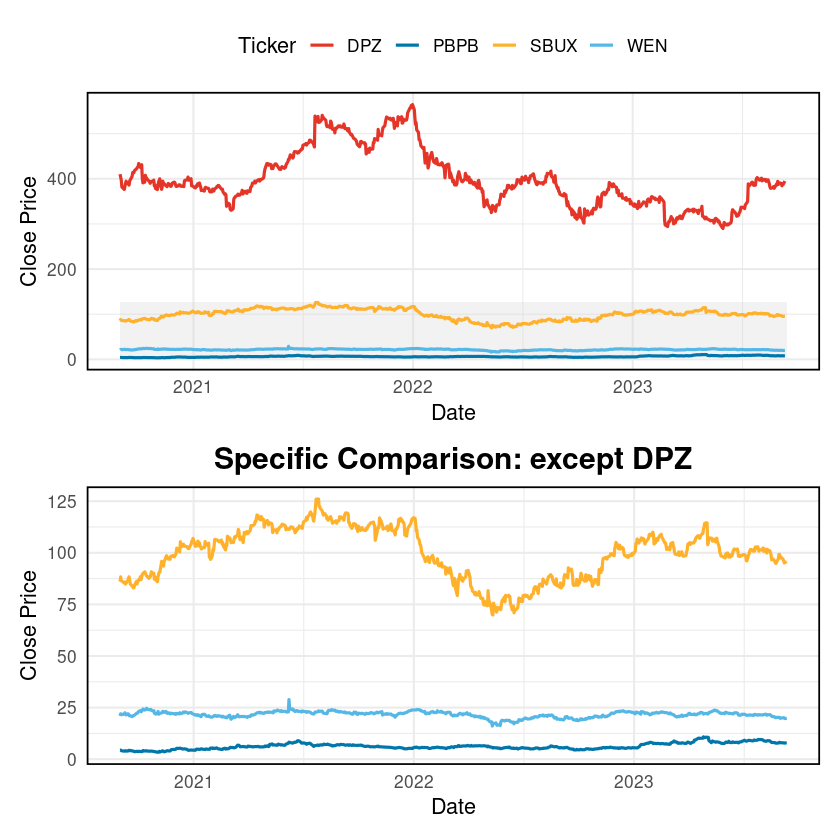

In [93]:
#| fig-cap: "Close Prices Comparison"
# Whole Close Prices Comparison
library(patchwork)

data_SBUX$Ticker <- "SBUX"
data_WEN$Ticker  <- "WEN"
data_PBPB$Ticker <- "PBPB"
data_DPZ$Ticker  <- "DPZ"

data_all <- rbind(
  data_SBUX[, c("datadate", "prccd", "Ticker")],
  data_WEN[,  c("datadate", "prccd", "Ticker")],
  data_PBPB[, c("datadate", "prccd", "Ticker")],
  data_DPZ[,  c("datadate", "prccd", "Ticker")]
)
data_all$datadate <- as.Date(data_all$datadate, format = "%d/%m/%Y")

others_range <- range(subset(data_all, Ticker %in% c("SBUX","WEN","PBPB"))$prccd, na.rm = TRUE)

p1 <- ggplot(data_all, aes(x = datadate, y = prccd, color = Ticker)) +
  annotate("rect",
           xmin = min(data_all$datadate), xmax = max(data_all$datadate),
           ymin = others_range[1], ymax = others_range[2],
           fill = "lightgrey", alpha = 0.3) +
  
  geom_line(linewidth = 0.9) +
  labs(x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    legend.position = "top"
  ) +
  scale_color_manual(values = c("SBUX" = "#ffb12cff", "WEN"  = "#55B7E6", "PBPB" = "#0076AA", "DPZ"  = "#E53528"
  ))

p2 <- ggplot(subset(data_all, Ticker %in% c("SBUX", "WEN", "PBPB")),
             aes(x = as.Date(datadate, format = "%d/%m/%Y"), y = prccd, color = Ticker)) +
  geom_line(linewidth = 0.9) +
  labs(title = "Specific Comparison: except DPZ", x = "Date", y = "Close Price") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    legend.position = "none"
  )+
    scale_color_manual(values = c("SBUX" = "#ffb12cff", "WEN"  = "#55B7E6", "PBPB" = "#0076AA"))

p1 / p2


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


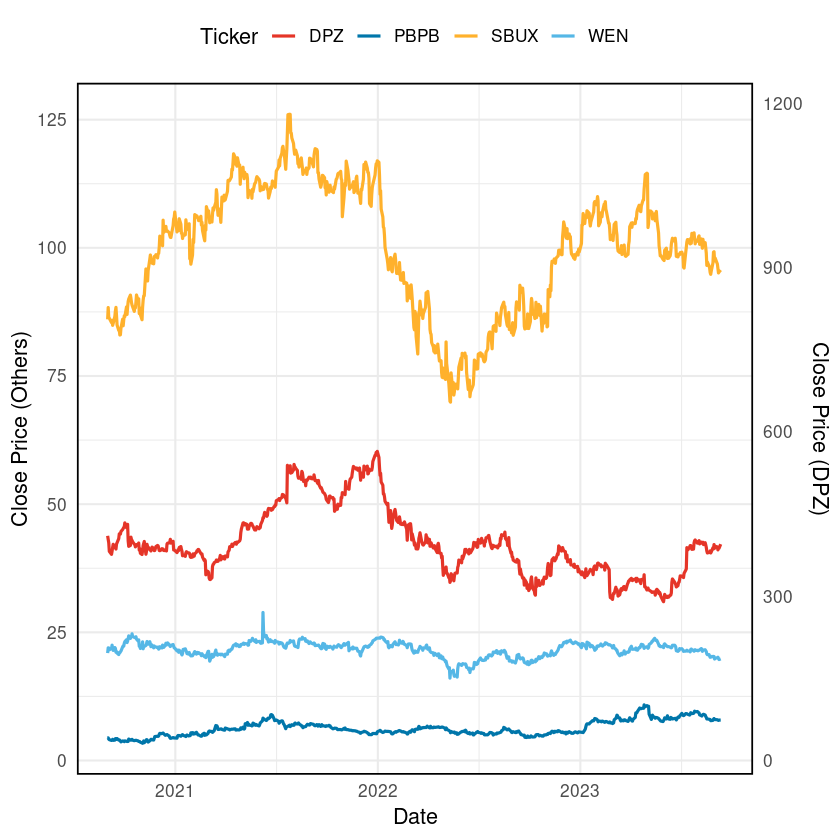

In [94]:
#| fig-cap: "Close Prices Comparison"
library(dplyr)
library(ggplot2)

scale_factor <- mean(data_all$prccd[data_all$Ticker == "DPZ"], na.rm = TRUE) /
                mean(data_all$prccd[data_all$Ticker != "DPZ"], na.rm = TRUE)

data_all2 <- data_all %>%
  mutate(prccd_scaled = ifelse(Ticker == "DPZ", prccd / scale_factor, prccd))

ggplot(data_all2, aes(x = datadate, y = prccd_scaled, color = Ticker)) +
  geom_line(linewidth = 0.9) +
  labs(x = "Date", y = "Close Price (Others)", color = "Ticker") +
  scale_y_continuous(
    sec.axis = sec_axis(~ . * scale_factor, name = "Close Price (DPZ)")
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    legend.position = "top"
  ) +
  scale_color_manual(values = c("SBUX" = "#ffb12cff", "WEN"  = "#55B7E6", "PBPB" = "#0076AA", "DPZ"  = "#E53528")
  )


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


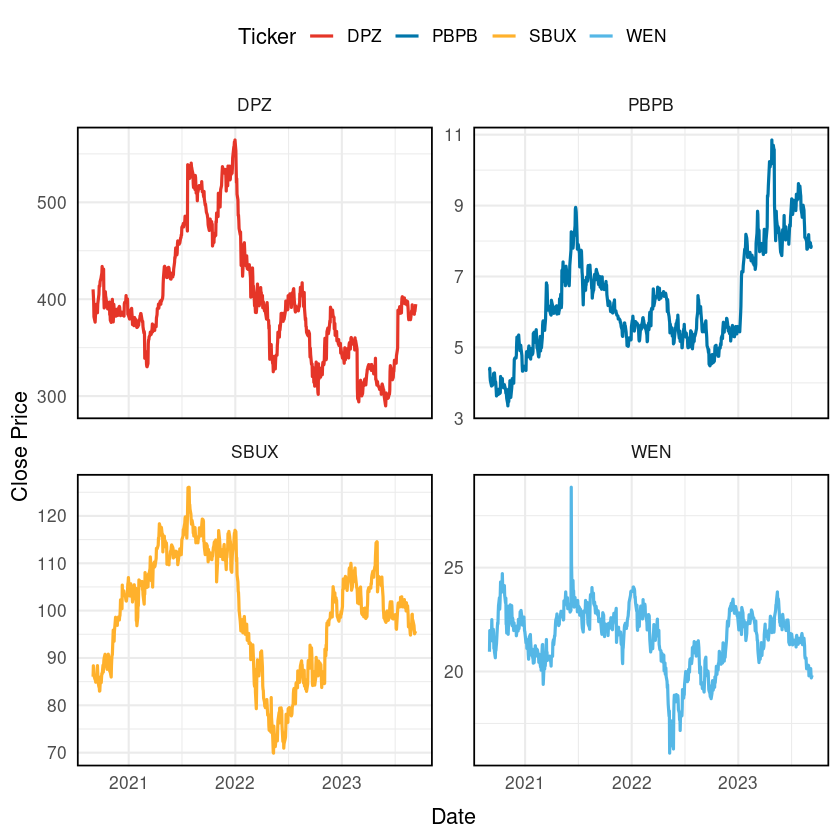

In [95]:
#| fig-cap: "Close Prices Comparison"
ggplot(data_all, aes(x = datadate, y = prccd, color = Ticker)) +
  geom_line(linewidth = 0.9) +
  labs(x = "Date", y = "Close Price") +
  facet_wrap(~Ticker, ncol = 2, scales = "free_y") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    legend.position = "top"
  ) +
  scale_color_manual(values = c("SBUX" = "#ffb12cff", "WEN"  = "#55B7E6", "PBPB" = "#0076AA", "DPZ"  = "#E53528")
  )

## Highest Mean Daily Return Ticker

Finally, focus is directed to the ticker with the highest mean daily return identified previously.

The calculations indicate that **PBPB (Potbelly)** recorded the highest mean daily return and is therefore selected for detailed analysis in the following section.


In [96]:
# determine which stock in SBUX, WEN, PBPB, DPZ has the highest mean daily return over the entire period
mean_returns <- c(mean_daily_return_SBUX, mean_daily_return_WEN, mean_daily_return_PBPB, mean_daily_return_DPZ)
names(mean_returns) <- c("SBUX", "WEN", "PBPB", "DPZ")
highest_mean_return_stock <- names(which.max(mean_returns))

# display the result
cat("The stock with the highest mean daily return is:", highest_mean_return_stock, ", with a mean daily return of", mean_returns[highest_mean_return_stock], "\n")

The stock with the highest mean daily return is: PBPB , with a mean daily return of 0.001279868 


### Task 3
Firstly, visualise the high and low prices of the PBPB (Potbelly) for the year 2021.

The following **line plot with two series** illustrates the volatility patterns within this single year.

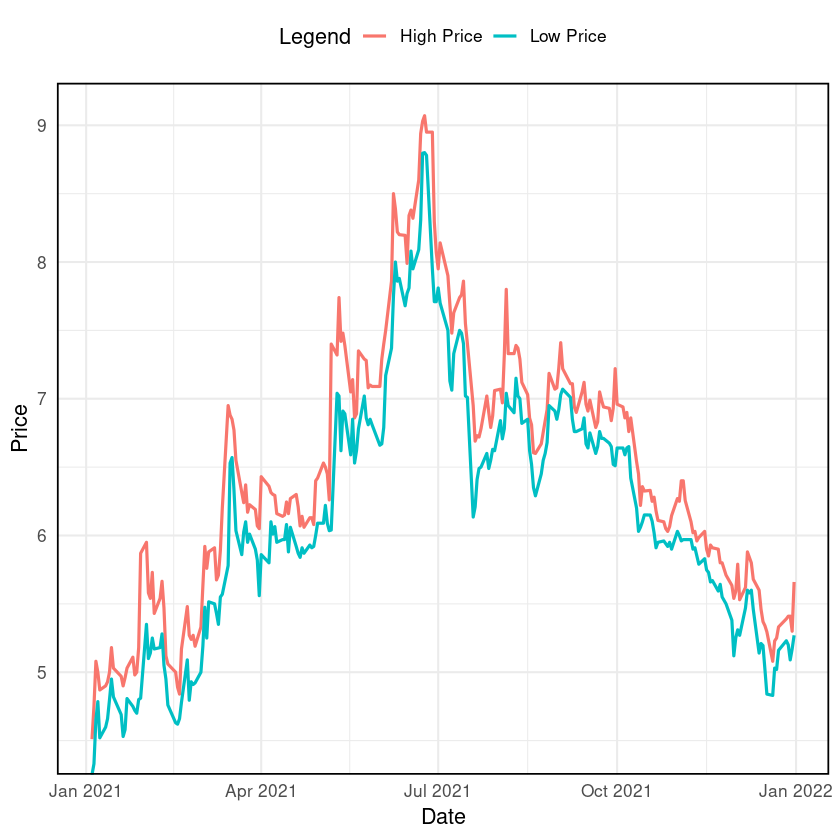

In [97]:
#| fig-cap: "High and Low Price for Potbelly (PBPB) in 2021"
# plot one line plot of high and low price in 2021 for PBPB
ggplot(filter(data_PBPB, year == 2021), 
       aes(x = as.Date(datadate, format = '%d/%m/%Y'))) +
  geom_line(aes(y = prchd, color = "High Price"), linewidth = 0.9) +
  geom_line(aes(y = prcld, color = "Low Price"),  linewidth = 0.9) +
  labs(x = "Date", y = "Price", color = "Legend") +
  scale_y_continuous(expand = expansion(mult = c(0, 0.05))) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    legend.position = "top"
  )


### Task 4

Secondly, visualise the trading volume of PBPB (Potbelly) over the entire period.

The result is demonstrated in a **bar chart** to observe fluctuations in market activity.

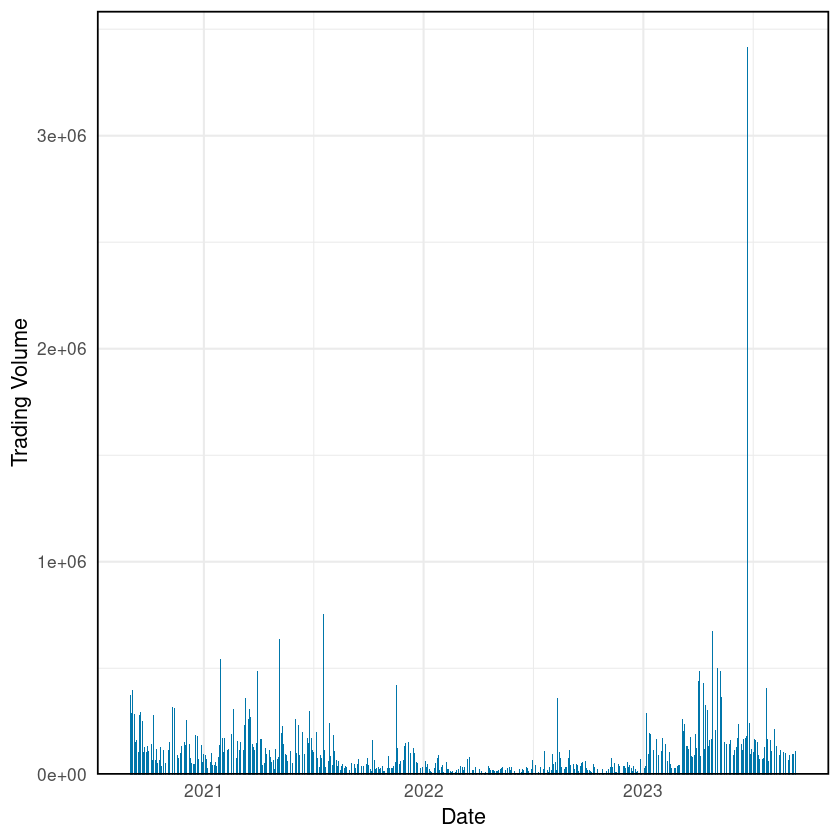

In [98]:
#| fig-cap: "Trading Volume for Potbelly (PBPB) Over Time"
# create the bat chart of Trading Volume for Potbelly (PBPB) Over Time
ggplot(data_PBPB, aes(x = as.Date(datadate, format = '%d/%m/%Y'), y = cshtrd)) +
  geom_col(fill = "#0076AA") + 
  labs(x = "Date", y = "Trading Volume") +
  scale_y_continuous(expand = expansion(mult = c(0, 0.05))) + 
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"), 
    panel.border = element_rect(color = "black", fill = NA, size = 1),
  )


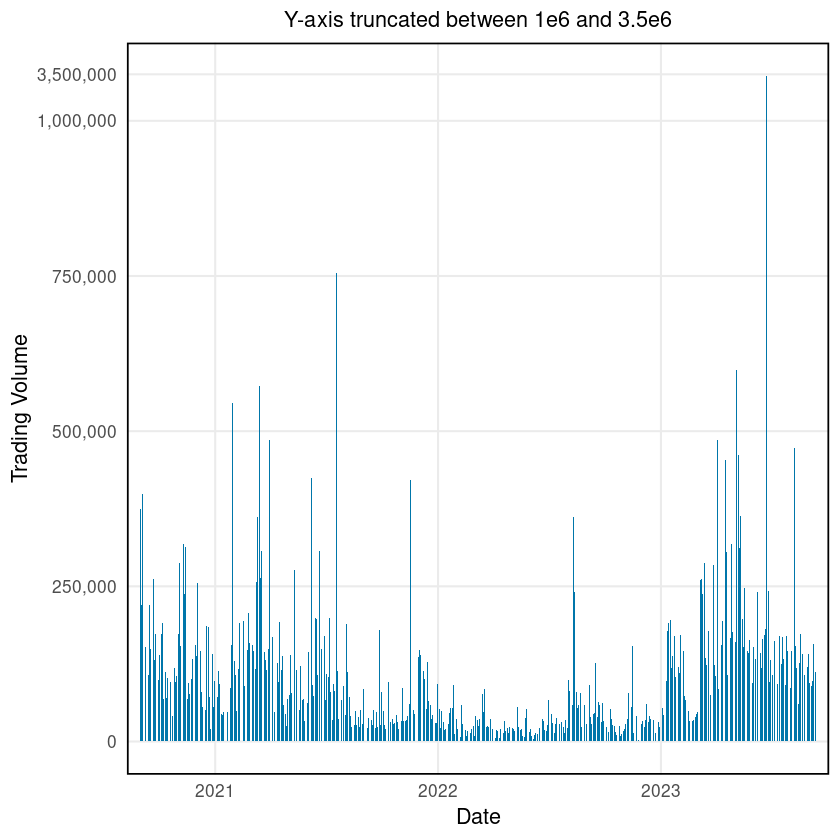

In [99]:
#| fig-cap: "Trading Volume for Potbelly (PBPB) Over Time"
# create the bat chart of Trading Volume for Potbelly (PBPB) Over Time
df <- data_PBPB
df$datadate <- as.Date(df$datadate, format = "%d/%m/%Y")

y_break_trans <- function(y1 = 1e6, y2 = 3.5e6, gap = 0.03) {
  trans <- function(y){
    ifelse(y <= y1, y,
           ifelse(y >= y2, y - (y2 - y1) + gap*(y2 - y1),
                  y1 + (y - y1) * gap))
  }
  inv <- function(z){
    ifelse(z <= y1, z,
           ifelse(z >= y1 + gap*(y2 - y1), z + (y2 - y1) - gap*(y2 - y1),
                  y1 + (z - y1) / gap))
  }
  scales::trans_new("y_break", trans, inv)
}
y1 <- 1e6; y2 <- 3.5e6; gap <- 0.03

p <- ggplot(df, aes(x = datadate, y = cshtrd)) +
  geom_col(fill = "#0076AA") +
  labs(subtitle = "Y-axis truncated between 1e6 and 3.5e6", x = "Date", y = "Trading Volume") +
  scale_y_continuous(
    trans  = y_break_trans(y1, y2, gap),
    breaks = c(0, 250000, 500000, 750000, 1000000, 3500000, 4000000),
    labels = scales::comma
  ) +
  scale_x_date(expand = expansion(mult = c(0.02, 0.02))) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 18, hjust = 0.5, face = "bold"),
    plot.subtitle= element_text(hjust = 0.5),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1),
    panel.grid.minor = element_blank()
  )
p


### Task 5

Thirdly, visualise the relationship between daily returns and trading volume of PBPB (Potbelly) in 2021.
 
As shown in the **scatter plot** below, the graph explores whether large trading volumes are associated with extreme returns.

`geom_smooth()` using formula = 'y ~ x'


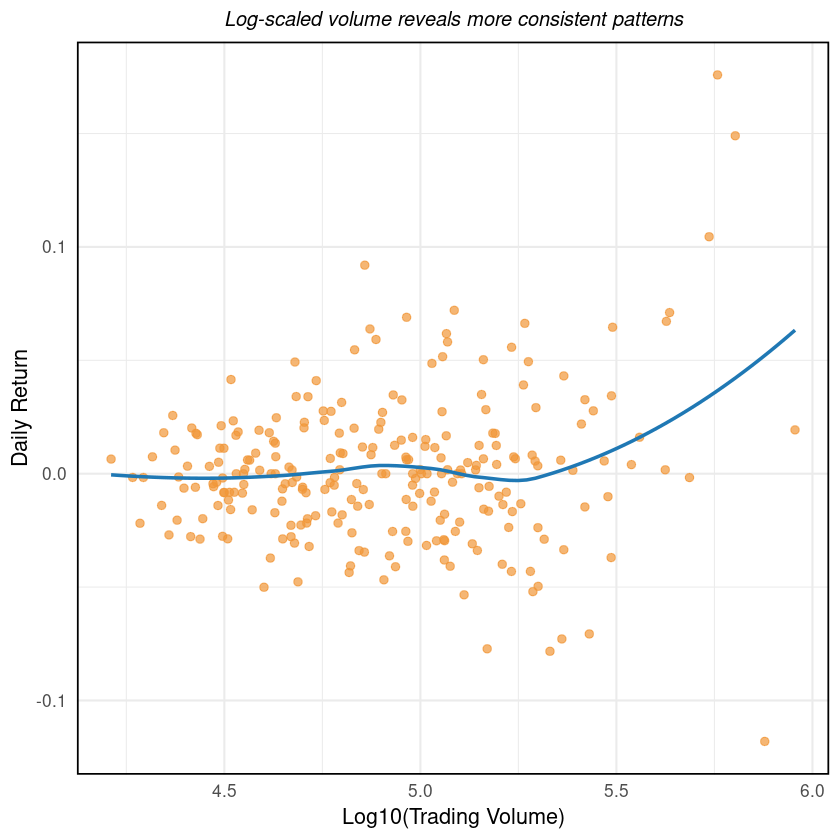

In [100]:
#| fig-cap: "Daily Return vs. Trading Volume for Potbelly (PBPB) in 2021"
# create scatter plot of daily return vs. trading volume for PBPB in 2021
ggplot(filter(data_PBPB, year == 2021), aes(x = log10(cshtrd), y = return_daily)) +
  geom_point(color = "#F09739", alpha = 0.7, size = 2) + 
  geom_smooth(method = "loess", se = FALSE, color = "#1F78B4", size = 1) +  
  labs(subtitle = "Log-scaled volume reveals more consistent patterns", x = "Log10(Trading Volume)", y = "Daily Return") +
  theme_minimal(base_size = 13) +
  theme(
    plot.title   = element_text(size = 16, hjust = 0.5, face = "bold"),
    plot.subtitle= element_text(size = 12, hjust = 0.5, face = "italic"),
    panel.border = element_rect(color = "black", fill = NA, size = 1)
  )


# **Analysis Report**

This report applied R-based quantitative and visual analysis to examine stocks in the Food and Beverage sector.

By calculating **key features** and identifying **extreme dates**, it provided an in-depth understanding of four separate tickers, further linking market reactions to **corporate announcements** to uncover underlying driving factors.

Subsequently, the visualisations offered clearer and complementary insights.

First, **Exchange 14** hosts the majority of active tickers, indicating a higher concentration of liquidity. 
Then, despite differences in price and volatility, **all four tickers** experienced a decline from mid-2021. Wendy’s led the recovery from 2022, whereas Domino’s (DPZ) continued to struggle.
Finally, a deeper investigation of the most profitable stock, **Potbelly (PBPB)**, revealed clustered mid-year volatility, trading-volume bursts during these periods, and a weak yet visible positive link between high volume and extreme returns.

Collectively, these findings illustrate how combining statistical computation with visual exploration enhances understanding of market dynamics and firm heterogeneity.